Best parameters found by Randomized Search:
{'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': None, 'preprocessor__num__with_mean': True, 'imputer__strategy': 'median'}
Best cross-validation score: 0.4883511128732663

Best parameters found by Bayesian Optimization:
OrderedDict([('imputer__strategy', 'median'), ('preprocessor__num__with_mean', True), ('regressor__max_depth', None), ('regressor__min_samples_leaf', 2), ('regressor__min_samples_split', 2), ('regressor__n_estimators', 100)])
Best cross-validation score: 0.4823871348566812


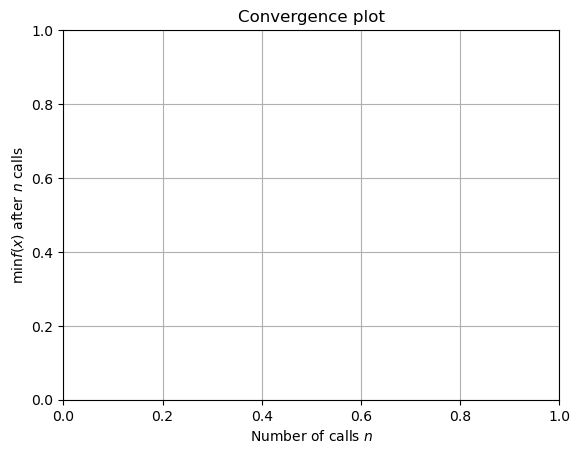

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("winequality-white.csv")

# Separate features and target
X = data.drop("quality", axis=1)
y = data["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the machine learning pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', RandomForestRegressor())
])

# Define hyperparameter search space
param_dist = {
    'preprocessor__num__with_mean': [True, False],
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Randomized Search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the pipeline with the training data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by Randomized Search:")
print(random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Bayesian Optimization
opt = BayesSearchCV(
    pipeline,
    search_spaces=param_dist,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42,
    n_points=1
)

# Fit the pipeline with the training data
opt.fit(X_train, y_train)

# Print the best parameters
print("\nBest parameters found by Bayesian Optimization:")
print(opt.best_params_)
print("Best cross-validation score:", opt.best_score_)

# Plot Bayesian Optimization Convergence
plot_convergence(opt)
plt.show()


In [ ]:
pip install scikit-optimize